In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep = '\t')

# Data Cleaning

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
data.drop_duplicates(inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data_new = data.copy()

In [7]:
data_new.dropna(how = 'any', inplace=True)

In [8]:
data_new.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [10]:
data_new['Dt_Customer'] = pd.to_datetime(data_new['Dt_Customer'], format = "%d-%m-%Y")

In [11]:
data_new['Dependants'] = data_new['Kidhome'] + data_new['Teenhome']

In [12]:
data_new['Age'] = 2014 - data_new['Year_Birth']

In [13]:
data_campain = data_new[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Response']]

In [14]:
num_purchases = data_new[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [15]:
data_monetary = data_new[['MntWines', 
             'MntFruits',
             'MntMeatProducts', 
             'MntFishProducts', 
             'MntSweetProducts', 
             'MntGoldProds']]

In [16]:
data['Complain'].value_counts()

Complain
0    2219
1      21
Name: count, dtype: int64

In [17]:
data_new.drop(columns= ['ID', 'Year_Birth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
                        'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Response', 'NumDealsPurchases', 
                        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
                        'Complain', 'Dt_Customer'], inplace=True)

In [18]:
data_new.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,57
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,60
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,49
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,30
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,33


In [19]:
data_encoded = pd.get_dummies(data_new, columns= ['Education', 'Marital_Status'])

In [20]:
data_encoded

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,57,False,False,True,False,False,False,False,False,False,True,False,False,False
1,46344.0,1,1,38,11,1,6,2,1,6,60,False,False,True,False,False,False,False,False,False,True,False,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,49,False,False,True,False,False,False,False,False,False,False,True,False,False
3,26646.0,1,0,26,11,4,20,10,3,5,30,False,False,True,False,False,False,False,False,False,False,True,False,False
4,58293.0,1,0,94,173,43,118,46,27,15,33,False,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,47,False,False,True,False,False,False,False,False,True,False,False,False,False
2236,64014.0,2,1,56,406,0,30,0,0,8,68,False,False,False,False,True,False,False,False,False,False,True,False,False
2237,56981.0,0,0,91,908,48,217,32,12,24,33,False,False,True,False,False,False,False,True,False,False,False,False,False
2238,69245.0,0,1,8,428,30,214,80,30,61,58,False,False,False,True,False,False,False,False,False,False,True,False,False


# Data Analysis

C:\Users\Nik\AppData\Local\Temp\ipykernel_5144\4222397093.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_purchases.rename(columns=new_labels_num, inplace=True)


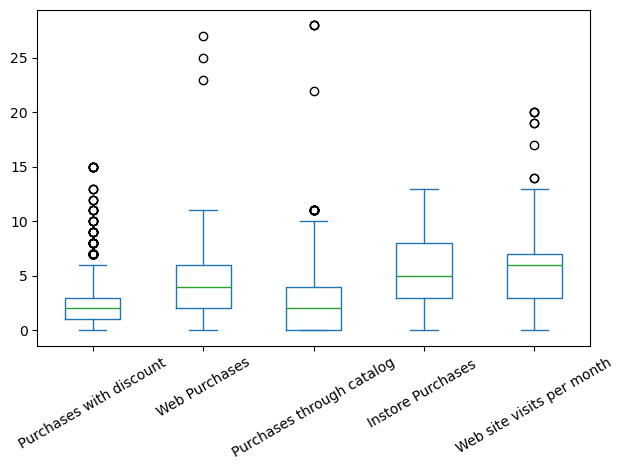

In [21]:
new_labels_num = {'NumDealsPurchases': 'Purchases with discount', 
              'NumWebPurchases': 'Web Purchases',
              'NumCatalogPurchases': 'Purchases through catalog',
              'NumStorePurchases': 'Instore Purchases ',
              'NumWebVisitsMonth': 'Web site visits per month'
          }

num_purchases.rename(columns=new_labels_num, inplace=True)           
ax = num_purchases.plot(kind='box')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

C:\Users\Nik\AppData\Local\Temp\ipykernel_5144\385954291.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_monetary.rename(columns=new_labels_mnt, inplace=True)


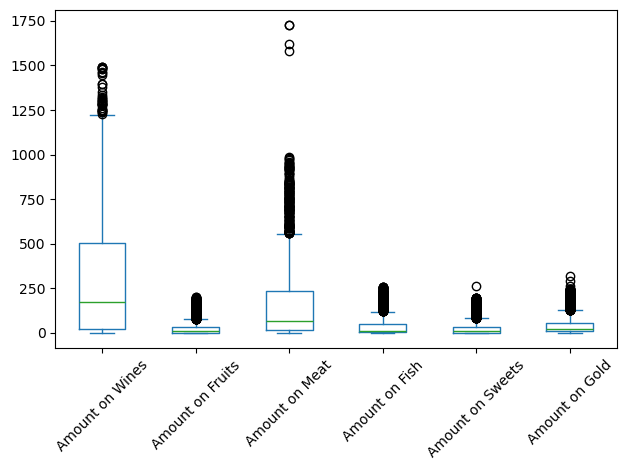

In [22]:
new_labels_mnt = {'MntWines': 'Amount on Wines', 
              'MntFruits': 'Amount on Fruits', 
              'MntMeatProducts': 'Amount on Meat', 
              'MntFishProducts': 'Amount on Fish',
              'MntSweetProducts': 'Amount on Sweets',
              'MntGoldProds': 'Amount on Gold'
             }
data_monetary.rename(columns=new_labels_mnt, inplace=True)

ax = data_monetary.plot(kind='box')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

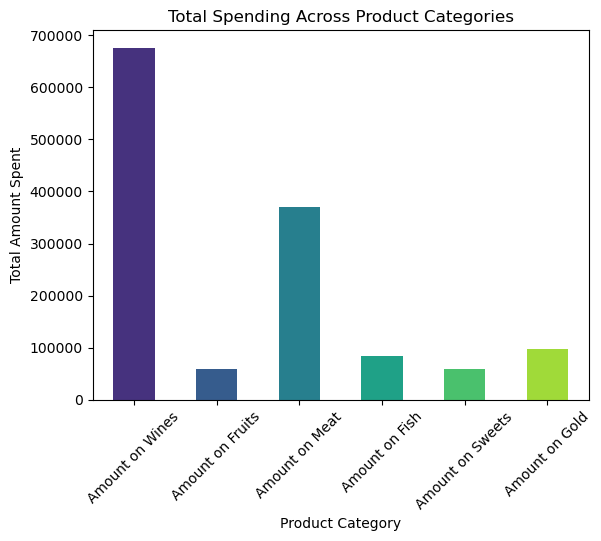

In [23]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending = data_new[spending_columns].sum()

total_spending.index = total_spending.index.map(new_labels_mnt)

total_spending.plot(kind='bar', color=sns.color_palette('viridis'))
plt.title('Total Spending Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.show()

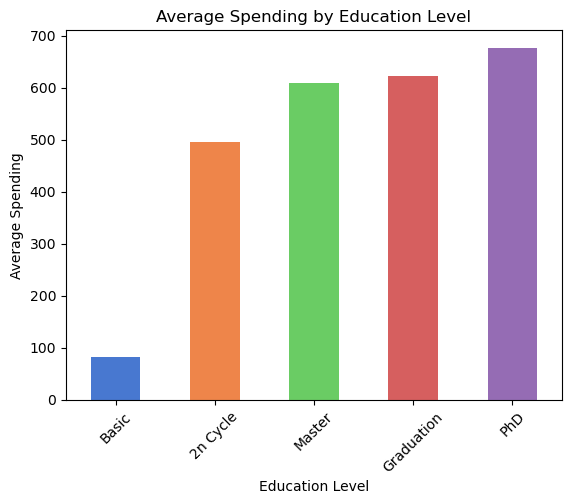

In [24]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

# Group by education and calculate total spending
education_spending = data_new.groupby('Education')['Total_Spending'].mean().sort_values()

# Plot the spending by education level
education_spending.plot(kind='bar', color=sns.color_palette('muted'))

plt.title('Average Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

C:\Users\Nik\AppData\Local\Temp\ipykernel_5144\2281090451.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=data, palette='muted')


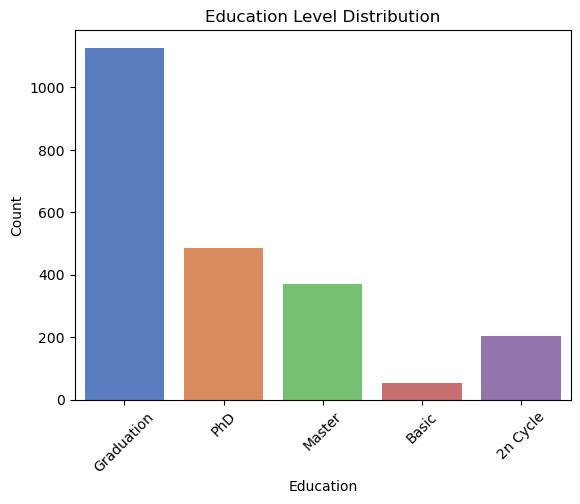

In [25]:
sns.countplot(x='Education', data=data, palette='muted')
plt.title('Education Level Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

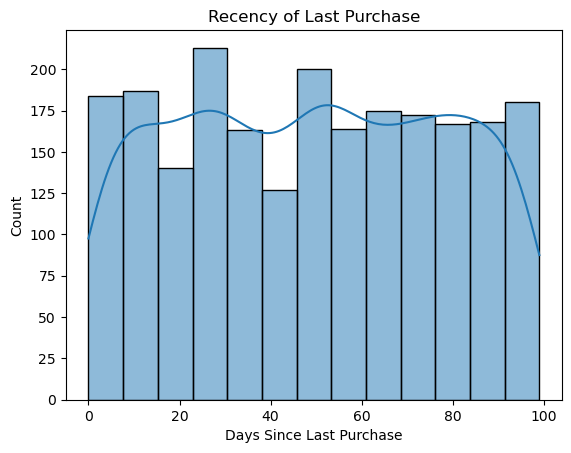

In [26]:
sns.histplot(data['Recency'], kde=True)
plt.title('Recency of Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Count')
plt.show()

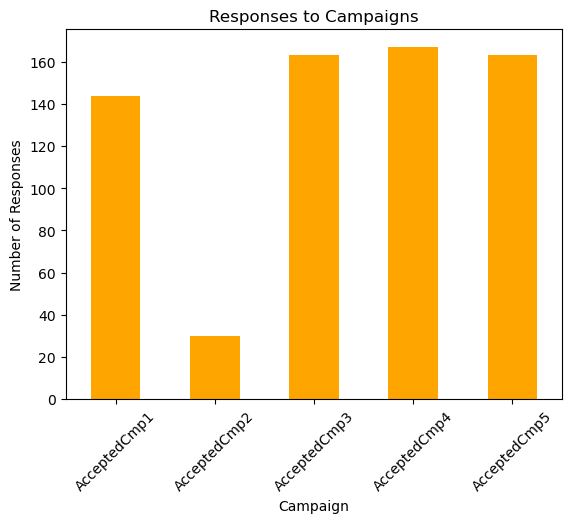

In [27]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_responses = data[campaign_columns].sum()

campaign_responses.plot(kind='bar', color='orange')
plt.title('Responses to Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.show()

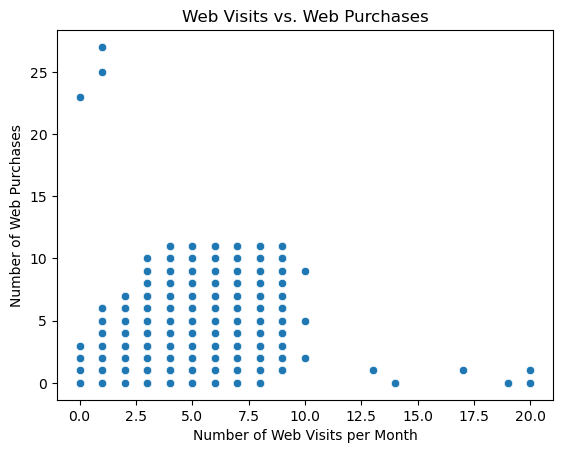

In [28]:
sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=data)
plt.title('Web Visits vs. Web Purchases')
plt.xlabel('Number of Web Visits per Month')
plt.ylabel('Number of Web Purchases')
plt.show()

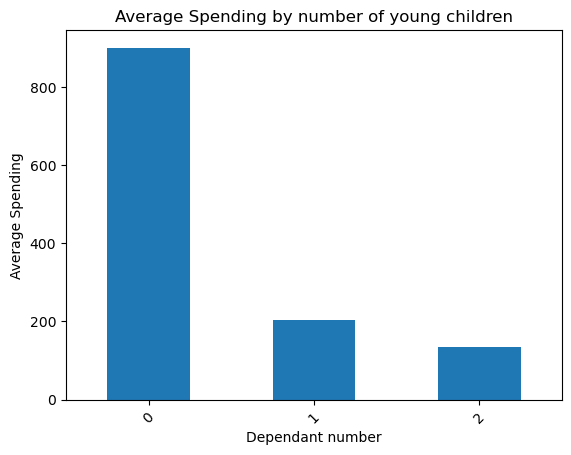

In [29]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

kids_spending = data_new.groupby('Kidhome')['Total_Spending'].mean().sort_values(ascending=False)

kids_spending.plot(kind='bar')

plt.title('Average Spending by number of young children')
plt.xlabel('Dependant number')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

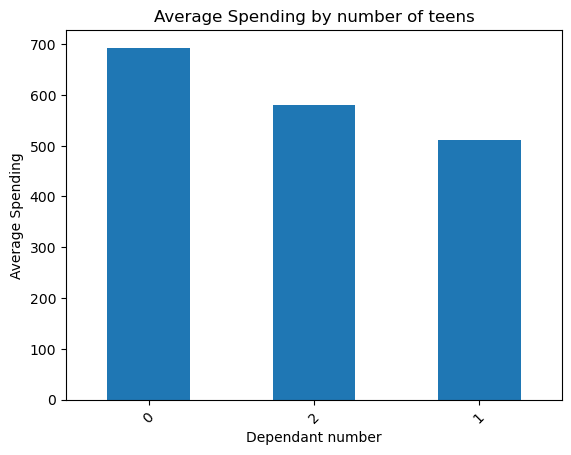

In [30]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

kids_spending = data_new.groupby('Teenhome')['Total_Spending'].mean().sort_values(ascending=False)

kids_spending.plot(kind='bar')

plt.title('Average Spending by number of teens')
plt.xlabel('Dependant number')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

C:\Users\Nik\AppData\Local\Temp\ipykernel_5144\606001067.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status', data=data_new, palette='viridis')


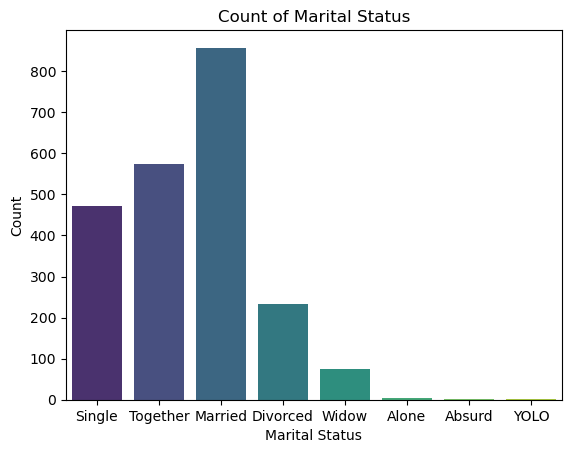

In [31]:
sns.countplot(x='Marital_Status', data=data_new, palette='viridis')
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

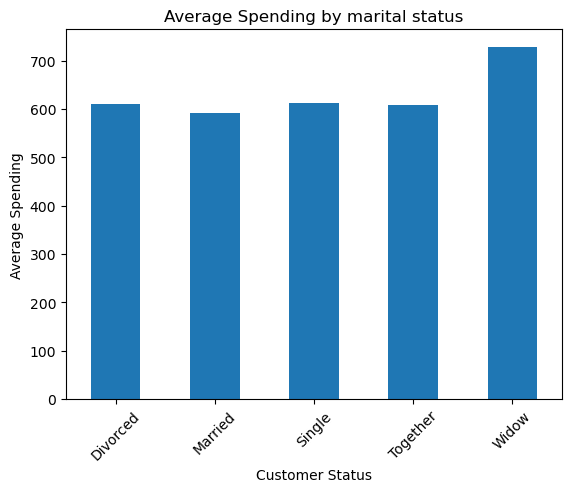

In [33]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

data_new_filtered = data_new[~data_new['Marital_Status'].isin(['Absurd', 'Alone', 'YOLO'])]

kids_spending = data_new_filtered.groupby('Marital_Status')['Total_Spending'].mean()

kids_spending.plot(kind='bar')

plt.title('Average Spending by marital status')
plt.xlabel('Customer Status')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()